In [1]:
import numpy as np
from keras.datasets import fashion_mnist

In [2]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("No. of sample observations in training dataset:",str(len(X_train)))
print("No. of labels in training dataset:",str(len(Y_train)))
print("Image Size:",str(X_train[0].shape))

No. of sample observations in training dataset: 60000
No. of labels in training dataset: 60000
Image Size: (28, 28)


In [5]:
print("No. of sample observations in test dataset:",str(len(X_test)))
print("No. of labels in test dataset:",str(len(Y_test)))
print("Image Size:",str(X_test[0].shape))

No. of sample observations in test dataset: 10000
No. of labels in test dataset: 10000
Image Size: (28, 28)


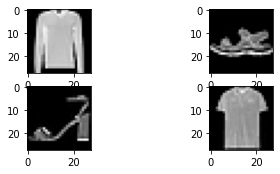

In [6]:
import matplotlib.pyplot as plt
plt.subplot(321)
rand_image = np.random.randint(0,len(X_train))
plt.imshow(X_train[rand_image],cmap=plt.get_cmap('gray'))

plt.subplot(322)
rand_image = np.random.randint(0,len(X_train))
plt.imshow(X_train[rand_image],cmap=plt.get_cmap('gray'))

plt.subplot(323)
rand_image = np.random.randint(0,len(X_train))
plt.imshow(X_train[rand_image],cmap=plt.get_cmap('gray'))

plt.subplot(324)
rand_image = np.random.randint(0,len(X_train))
plt.imshow(X_train[rand_image],cmap=plt.get_cmap('gray'))

In [7]:
#Building CNN model
from keras.utils import np_utils #for converting array of labeled data to one hot encoding vector
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras import backend as K #tensorflow serving as backend engine to keras

In [8]:
# Training parameters
Batch_size = 128
epochs = 100

In [9]:
# storing image info
image_rows = X_train.shape[1]
image_cols = X_train.shape[2]

In [10]:
X_train= X_train.reshape(X_train.shape[0], image_rows,image_cols,1)
X_test= X_test.reshape(X_test.shape[0], image_rows,image_cols,1)



In [11]:
inputimage_shape = (image_rows,image_cols,1)

In [12]:
 X_train=X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
#Normalize the data
X_train = X_train/255
X_test = X_test/255

In [14]:
# one hot encoding
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [15]:
# Calculate the number of classes and number of pixels in test data
Num_of_Class = Y_test.shape[1]
Num_of_pixels = X_train.shape[1]*X_train.shape[2]

In [16]:
# Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=inputimage_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(Num_of_Class, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [ ]:
# Training the model
Fit_model = model.fit(X_train,Y_train,batch_size=Batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))
Test_score = model.evaluate(X_test,Y_test,verbose=0)
print('Loss :',Test_score[0])
print('Accuracy :',Test_score[1])

Epoch 1/100
469/469 [==============================] - 40s 11ms/step - loss: 0.5936 - accuracy: 0.8009 - val_loss: 13.9521 - val_accuracy: 0.1100
Epoch 2/100
469/469 [==============================] - 4s 10ms/step - loss: 0.2839 - accuracy: 0.9007 - val_loss: 0.2735 - val_accuracy: 0.9003
Epoch 3/100
469/469 [==============================] - 4s 10ms/step - loss: 0.2378 - accuracy: 0.9167 - val_loss: 0.2831 - val_accuracy: 0.9022
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2022 - accuracy: 0.9271 - val_loss: 0.2210 - val_accuracy: 0.9205
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1823 - accuracy: 0.9332 - val_loss: 0.2304 - val_accuracy: 0.9174
Epoch 6/100
469/469 [==============================] - 4s 10ms/step - loss: 0.1600 - accuracy: 0.9431 - val_loss: 0.2283 - val_accuracy: 0.9204
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1454 - accuracy: 0.9487 - val_loss: 0.2478 - val_accuracy:

In [ ]:
# Configuration related preprocessing step before mounting the drive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Change the directory to current working directory
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

In [ ]:
model.save('Apparel_classification_model.h5')

In [ ]:
# Import few more necessary libraries.
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Function to load and prepare the image in right shape
def load_image(filename):
	# Load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# Convert the image to array
	img = img_to_array(img)
	# Reshape the image into a sample of 1 channel
	img = img.reshape(1, 28, 28, 1)
	# Prepare it as pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# Load an image and predict the apparel class
img = load_image('C:/Users/reena/Desktop/sandal.jpg')
# Load the saved model
model = load_model('Apparel_classification_model.h5')
# Predict the apparel class
class_prediction = model.predict_classes(img)
print(class_prediction[0])

#Map apparel category with the numerical class
if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Sandal"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FileNotFoundError: ignored